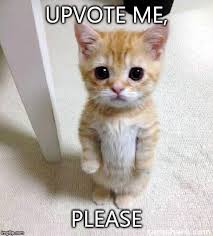

# **What is a Recommendation System?**

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play.  Recommendation Systems are a type of **information filtering systems** as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.  


Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general.
Moreover,  companies like Netflix and Spotify  depend highly on the effectiveness of their recommendation engines for their business and sucees.

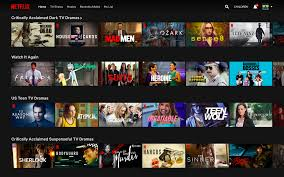

**So let's go!**

The basic system of recommendations is:-

> *  **Demographic Filtering**- They offer generalized recommendations to every user, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.



The other Recommender systems produce a list of recommendations in any of the two ways –

> : **Collaborative filtering**: Collaborative filtering approaches build a model from user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that user may have an interest in.


> : **Content-based filtering**: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on user’s past preferences.
Let’s develop a basic reco

Let's load the data now.

In [ ]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('../input/movies-dataset/movie_dataset.csv')

In [ ]:
df1.columns

The columns names are self explanagtory with the fact having the average people rating of the movies with genres , caste ,crew , budgets, director, release date and much more factual knowledge.

In [ ]:
df1.head(5)

In [ ]:
import matplotlib.pyplot as plt
rich=df1.sort_values('budget',ascending=False)

fig, ax = plt.subplots()
rects1 = ax.bar(rich['title'].head(15),rich['budget'].head(15), color=["Red","Orange","Yellow","Green","Blue"])
plt.xlabel("Movie Title")
plt.rcParams["figure.figsize"] = (50,50)
plt.title("Budget Wise top movies")
plt.ylabel("Movie Budeget")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height/100000),
        ha='center', va='bottom')
autolabel(rects1)
plt.xticks(rotation=90)

plt.show()

In [ ]:
rich1=df1.sort_values('vote_average',ascending=False)
rich1.head()

In [ ]:

fig, ax = plt.subplots()
rects1 = ax.bar(rich1['title'].head(20),rich1['vote_average'].head(20), color=["Red","Orange","Yellow","Green","Blue"])
plt.xlabel("Movie Title")
plt.rcParams["figure.figsize"] = (30,20)
plt.title("Rating Wise top movies")
plt.ylabel("Average rating")

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%f' % float(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.xticks(rotation=90)

plt.show()

# **Demographic Filtering** -
*This system aims to categorize the users based on attributes and make recommendations based on demographic classes. ... The benefit of a demographic approach is that it does not require a history of user ratings like that in collaborative and content based recommender systems.*
   Before getting started with this  -
* we need a metric to score or rate movie 
* Calculate the score for every movie 
* Sort the scores and recommend the best rated movie to the users.

We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes.
So, I'll be using IMDB's weighted rating (wr) which is given as :-

![](https://image.ibb.co/jYWZp9/wr.png)
where,
* v is the Vote_count of a movie;
* m is the minimum votes required to be listed in the top chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(**vote_count**) and R (**vote_average**) and C can be calculated as 

In [ ]:
C= df1['vote_average'].mean()
print(C)


The average rating of a movie present in this dataset is around 6.
tThe nest step is to determine the number of vote count required for a particular movie to reflect on the top. 
For this we shall set the crieteria at 90% and find the total vote counts of the movies which are above 90%.

In [ ]:
m= df1['vote_count'].quantile(0.9)
m

Now, we can filter out the movies that qualify for the top..

In [ ]:
q_movies = df1.copy().loc[df1['vote_count'] >= m]
q_movies.shape

As we can see around 481 movies are present with the average vote count above m. So now lets merge them and calculate the WEIGHTED RATING.

In [ ]:
def weightedrating(x,m=m,C=C):
    
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# A new column for weighted rating named weight_score in the dataset
q_movies['weight_score'] = q_movies.apply(weightedrating, axis=1)

Lest get the top movies for the dataset

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('weight_score', ascending=False)

#Print the top 20 movies
q_movies[['title', 'vote_count', 'vote_average', 'weight_score']].head(20)

So these are the top 20 movies which can be placed under the **'TRENDING NOW'** tab.

In [ ]:
pop= df1.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(5),pop['popularity'].head(5), align='center',
        color=['red','pink','orange','yellow','green'])
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user.
This is when we move on to a more refined system-  Content Basesd Filtering. 

# **Content Based Filtering**
Content-based recommenders treat recommendation as a user-specific classification problem and learn a classifier for the user's likes and dislikes based on an item's features. In this system, keywords are used to describe the items and a user profile is built to indicate the type of item this user likes.
In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

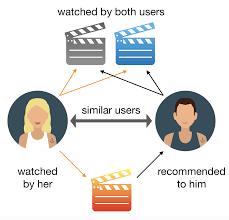

## **Credits, Genres and Keywords Based Recommender**

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the **overview** feature of our dataset. 
Let's take a look at the data. .. 

We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

>*Get the index of the movie given its title.*



>*Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.*



> *Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.*


> *Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).*


>*Return the titles corresponding to the indices of the top elements.*

In [ ]:
df1['overview'].head(5)

For any of you who has done even a  bit of text processing before knows we need to convert the word vector of each overview.
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

Now if you are wondering what is term frequency , it is the relative frequency of a word in a document and is given as
   **(term instances/total instances)**.
Inverse Document Frequency is the relative count of documents containing the term is given as 
**log(number of documents/documents with term)**
The overall importance of each word to the documents in which they appear is equal to **TF * IDF**

This will give you a matrix where each column represents a word in the overview vocabulary (all the words that appear in at least one document) and each row represents a movie, as before.This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

Fortunately, scikit-learn gives you a built-in TfIdfVectorizer class that produces the TF-IDF matrix in a couple of lines. That's great, isn't it? 

In [ ]:
features = ['keywords','cast','genres','director']
##Step 3: Create a column in DF which combines all selected features

for feature in features:
   df1[feature] = df1[feature].fillna('')

def combine_features(row):
    try:
        return row['keywords'] +" "+row['cast']+" "+row["genres"]+" "+row["director"]
    except:
        print("Error:", row)

df1["combined_features"] = df1.apply(combine_features,axis=1)


We see that over 20,000 different words were used to describe the 4800 movies in our dataset.



We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:
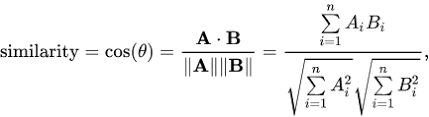

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's **linear_kernel()** instead of cosine_similarities() since it is faster.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
cv = CountVectorizer()
count_matrix = cv.fit_transform(df1["combined_features"])

##Step 5: Compute the Cosine Similarity based on the count_matrix
cosine_sim = cosine_similarity(count_matrix) 
sim_df = pd.DataFrame(cosine_sim,index=df1.title,columns=df1.title)
sim_df.head()

In [ ]:
movie_user_likes = "Avatar"
sim_df[movie_user_likes].sort_values(ascending=False)[:20]

In [ ]:
movie_user_likes = "Gravity"
sim_df[movie_user_likes].sort_values(ascending=False)[:20]

#  *COLLABORATIVE FITTING MODEL* 





In [ ]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
ratings = pd.read_csv("../input/colab-fitting/toy_dataset.csv",index_col=0)
ratings = ratings.fillna(0)
ratings

# We are taking a transpose since we want similarity between items which need to be in rows

In [ ]:
def standardize(row):
    new_row = (row - row.mean())/(row.max()-row.min())
    return new_row

ratings_std = ratings.apply(standardize)


item_similarity = cosine_similarity(ratings_std.T)
print(item_similarity)

In [ ]:
item_similarity_df = pd.DataFrame(item_similarity,index=ratings.columns,columns=ratings.columns)
item_similarity_df

RECOMMENDATIONS AS FOLLOWS:-

In [ ]:

def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    return similar_score

print(get_similar_movies("romantic3",1))

In [ ]:
action_lover = [("action1",5),("romantic2",1),("romantic3",1)]

similar_movies = pd.DataFrame()

for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)

similar_movies.head()
similar_movies.sum().sort_values(ascending=False)

## Please upvote and suggest other methods for recommendations...